In [4]:
import os
import torchvision
# import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
from PIL import Image
import pandas as pd
import shutil

## Prepare dataframe

In [5]:
wee_ves_dir = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D'
# os.listdir(wee_ves_dir)
tsv_file = os.path.join(wee_ves_dir,'images-config.tsv')
df = pd.read_table(tsv_file,delim_whitespace=True,header=None)

# pd.read_table(tsv_file,delim_whitespace=True,header=0)

df = df.rename(columns={0: "label", 
                   1: "name",
                   2: "index",
                   4: "bodyheadszratio",
                   5: "bodyheadcolordiff",
                   6: "bodysz",
                   7: "bodycolor",
                   8: "bodycolorlighter"
                   })
# def clean_df(df)
features =  ["bodyheadszratio",
             "bodyheadcolordiff",
             "bodysz",
             "bodycolor",
             "bodycolorlighter"]
def extract_feature(x):
    x_new= x.split('=')[1]
    return x_new
     
for feature in features:
    df[feature] = df.apply(lambda row : extract_feature(row[feature]), axis = 1)

# for index, row in df.iterrows():
#     for feature in features:
#         # print(row[feature])
#         # print(row[feature].split('=')[0])
#         row[feature] = row[feature].split('=')[1]
    # break
for fea in features:
    df[fea] = df[fea].astype('float')
df

,label,name,index,3,bodyheadszratio,bodyheadcolordiff,bodysz,bodycolor,bodycolorlighter
0,0,weevil,0,0,0.33,0.15,0.65,0.12,0.0
1,0,weevil,1,1,0.25,0.05,0.65,0.18,0.0
2,0,weevil,2,2,0.38,0.14,0.54,0.06,0.0
3,0,weevil,3,3,0.38,0.22,0.55,0.05,0.0
4,0,weevil,4,4,0.43,0.00,0.43,0.13,1.0
...,...,...,...,...,...,...,...,...,...
195,1,vespula,195,195,0.62,0.30,0.47,0.23,0.0
196,1,vespula,196,196,0.58,0.55,0.53,0.20,1.0
197,1,vespula,197,197,0.80,0.35,0.52,0.22,1.0
198,1,vespula,198,198,0.45,0.63,0.39,0.14,1.0


## Generate new decision boundary

In [6]:
import seaborn as sns

for i in range(len(features)):
    for j in range(i+1, len(features)):
        if i ==j: continue
        # sns.scatterplot(x=features[i], y=features[j], hue='label', data=df)
        # plt.show() 
        break
# sns.scatterplot(x="x1", y="x2", hue='class', data=data)

In [133]:
df = pd.read_csv("/net/scratch/tianh-shared/wv-3d/data.csv")
selected_features = ["head size","body size","tail size", "texture"]
clf = LogisticRegression().fit(df[selected_features],df['label'])
df

,Unnamed: 0,img_id,label,head size,body size,tail size,texture
0,0,0.png,0,1.637854,1.078957,0.313675,-0.313675
1,1,1.png,0,-1.659968,-0.824899,-0.543817,0.543817
2,2,2.png,0,-1.856387,1.950230,1.379527,-1.379527
3,3,3.png,0,1.554202,0.886635,-0.603218,0.603218
4,4,4.png,0,1.681563,0.794190,1.105545,-1.105545
...,...,...,...,...,...,...,...
315,315,315.png,1,-0.356652,0.554175,0.599029,-0.599029
316,316,316.png,1,-0.509185,0.370120,-0.135512,0.135512
317,317,317.png,0,0.968567,1.615310,-0.492433,0.492433
318,318,318.png,1,0.557385,0.679140,1.027593,-1.027593


In [134]:
def pseudo_label_4fea(clf,x1,x2,x3,x4):
    w1, w2, w3, w4 = clf.coef_.T
    b = clf.intercept_[0]

    b = -b/w4
    w1 = -w1/w4
    w2 = -w2/w4
    w3 = -w3/w4
    ws = np.squeeze(np.array([w1,w2,w3]))
    xs = np.array([x1,x2,x3])
    l_prime = np.dot(ws,xs)+b
    if x4 > l_prime: return 1
    else: return 0

df["pseudo_label"] = df.apply(lambda row : pseudo_label_4fea(clf, row[selected_features[0]],row[selected_features[1]],row[selected_features[2]],row[selected_features[3]]), axis = 1)
# plot_3d(df, selected_features, clf, "pseudo_label")

In [138]:
df

,Unnamed: 0,img_id,label,head size,body size,tail size,texture,pseudo_label
0,0,0.png,0,1.637854,1.078957,0.313675,-0.313675,0
1,1,1.png,0,-1.659968,-0.824899,-0.543817,0.543817,1
2,2,2.png,0,-1.856387,1.950230,1.379527,-1.379527,0
3,3,3.png,0,1.554202,0.886635,-0.603218,0.603218,1
4,4,4.png,0,1.681563,0.794190,1.105545,-1.105545,0
...,...,...,...,...,...,...,...,...
315,315,315.png,1,-0.356652,0.554175,0.599029,-0.599029,0
316,316,316.png,1,-0.509185,0.370120,-0.135512,0.135512,1
317,317,317.png,0,0.968567,1.615310,-0.492433,0.492433,1
318,318,318.png,1,0.557385,0.679140,1.027593,-1.027593,0


In [143]:
for i in range(320):
    c = str(df.iloc[i]["pseudo_label"])
    img = df.iloc[i]["img_id"]
    src = os.path.join("/net/scratch/tianh-shared/wv-3d/imgs",img)
    dst = os.path.join("/net/scratch/tianh-shared/wv-3d/pseudo_label",c)
    # print(dst)
    shutil.copy(src, dst) 

In [ ]:

from sklearn.linear_model import LogisticRegression
selected_features = [features[0], features[1]]
xmin, xmax = min(df[selected_features[0]]), max(df[selected_features[0]])
ymin, ymax = min(df[selected_features[1]]), max(df[selected_features[1]])
clf = LogisticRegression().fit(df[selected_features],df['label'])
# df[selected_features]
# df['label']

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')
colors = ["r","g"]
for i in range(320):
    ax.scatter(df[selected_features[0]][i], df[selected_features[1]][i], df[selected_features[2]][i], c=colors[df["label"][i]])
plt.show()

In [92]:
def plot_3d(df, selected_features, clf, label="label"):
    b = clf.intercept_[0]
    w1, w2, w3 = clf.coef_.T
    b = -b/w3
    w2 = -w2/w3
    w1 = -w1/w3
    X = np.linspace(-2,2,100)
    Y = np.linspace(-2,2,100)
    X, Y = np.meshgrid(X, Y)
    Z = w1*X + w2*Y + b
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(projection='3d')
    ax.view_init(10, 30)
    colors = ["r","g"]
    for i in range(320):
        ax.scatter(df[selected_features[0]][i], df[selected_features[1]][i], df[selected_features[2]][i], c=colors[df[label][i]])
    ax.plot_surface(X, Y, Z, alpha=0.5)
    plt.show()

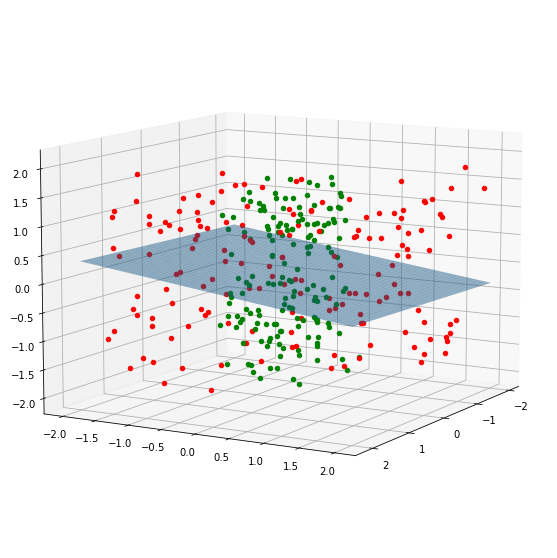

In [93]:
plot_3d(df, selected_features, clf)

In [131]:
def pseudo_label(clf,row, selected_features):
    w = clf.coef_.T[-1]
    b = clf.intercept_[0]/w[0]
    ws = np.squeeze(np.array(clf.coef_.T[:-1])/w)

    x = np.array([row[selected_features[i]] for i in range(len(ws))])
    l = np.array(row[selected_features[-1]])
    l_prime = np.dot(x, ws) + b
    print(l_prime)
    if l>l_prime: return 1
    else: return 0

# df["pseudo_label"] = df.apply(lambda row : pseudo_label(clf, row[selected_features[0]],row[selected_features[1]],row[selected_features[2]]), axis = 1)
df["pseudo_label"] = df.apply(lambda row : pseudo_label(clf, row, selected_features), axis = 1)

0.1396663816115926
-0.09962972624784672
0.33944739518057565
0.11099218766772218
0.0941858854119139
0.040069630785549724
0.08125511366439454
0.19461983722640816
0.016720344217518102
-0.20340928849416154
0.16075480928946967
-0.025105974594263034
0.26677871848532236
0.19530533025745359
0.051174905128311805
-0.11525026889841411
0.06075132771521527
0.12113419029185479
0.07546773568736553
-0.021801276615748977
-0.023398613927468972
-0.008843396260420435
0.07334261872716588
0.10845415755380154
0.21641110597383478
0.07473757211591434
-0.2229654478365093
-0.06477465246846645
-0.2092550058715459
-0.07654482643521321
-0.09876185113566989
-0.09199583389244458
0.2744226968715907
-0.0052698900407754075
-0.08657199078602835
0.03258838824269936
-0.255621908565078
-0.2593813269286188
0.057121284391859255
-0.0897907776478618
-0.29064369814801894
-0.04266685085124679
0.21872060940953228
-0.10137266700973901
-0.07084791670381142
0.12737110158794082
0.09144296408056554
-0.09330661878587387
0.22344347988128

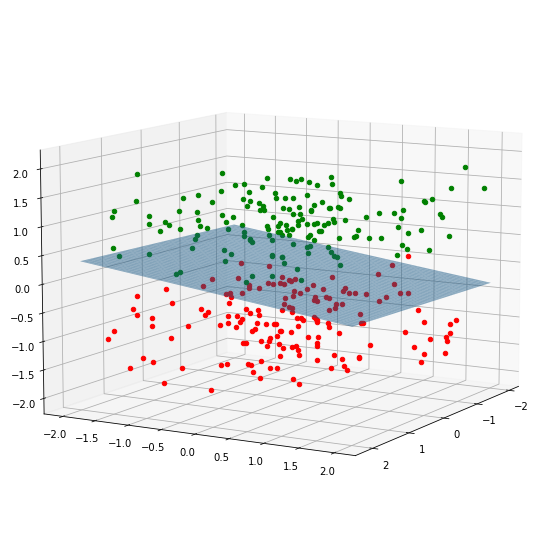

In [132]:
plot_3d(df, selected_features, clf, "pseudo_label")

[3.64141418] [4.98639259] -3.4189255911802827
[-0.73027025] [0.68565111]


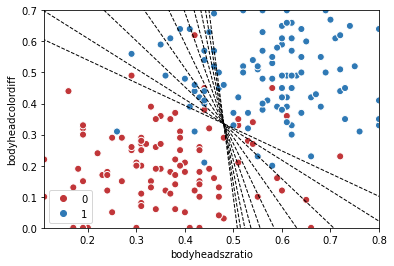

In [17]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
# print(w1,w2,b)

# Plot the data and the classification with the decision boundary.

xd = np.array([0, 1])
# yd = m*xd + c
print(m,c)
for i in range(10):
    m-=0.25*i
    c+=0.12*i
    yd = m*xd + c
    # print(m,c)
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    # plt.fill_bet:ween(xd, yd, ymin, color='tab:blue', alpha=0.2)
# plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
scatter = plt.scatter(df[selected_features[0]],df[selected_features[1]], c=df['label'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
# scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
# plt.legend()
# plt.scatter(*df[Y==0].T, s=8, alpha=0.5)
# plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.ylabel(r'$x_2$')
plt.ylabel(selected_features[1])
plt.xlabel(selected_features[0])

plt.show()

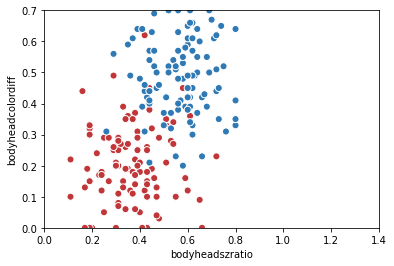

In [12]:


def plot_func(w,b,label_column):
    xd = np.array([0, 1])
    yd = w*xd + b
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.scatter(df[selected_features[0]],df[selected_features[1]], c=df[label_column], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

    # plt.xlim(xmin, xmax)
    # plt.ylim(ymin, ymax)
    plt.xlim(0, 1.4)
    plt.ylim(0, 0.7)
    plt.ylabel(selected_features[1])
    plt.xlabel(selected_features[0])
    plt.show()

# c = -b/w2
# m = -w1/w2
# print(w1,w2,b)
xd = np.array([0, 1])
# yd = m*xd + c
# print(m,c)
colors = ['k','y']
# for i,cor in zip([0,8],colors):
#     m-=0.25*i
#     c+=0.12*i
#     yd = m*xd + c
    # print(m,c)
    # plt.plot(xd, yd, cor, lw=1, ls='--')

plt.scatter(df[selected_features[0]],df[selected_features[1]], c=df['label'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

# plt.xlim(xmin, xmax)
plt.xlim(0, 1.4)
plt.ylim(0, 0.7)
# plt.ylim(ymin, ymax)

plt.ylabel(selected_features[1])
plt.xlabel(selected_features[0])

plt.show()

## Generate labels

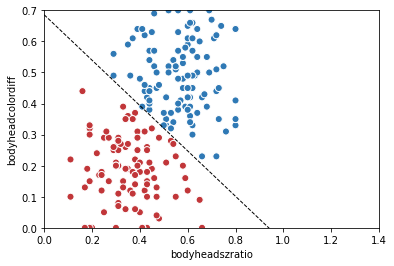

In [13]:
def return_label(w,b,x,y):
    y_prime = w*x+b
    if y>y_prime:
        return 1
    else:
        return 0

w = -0.73027025
b = 0.68565111
# plot_func(w,b,'label')

df['pseudo_label'] = df.apply(lambda row : return_label(w,b,row[selected_features[0]],row[selected_features[1]]), axis = 1)
plot_func(w,b,'pseudo_label')

# df


## Human distorted space

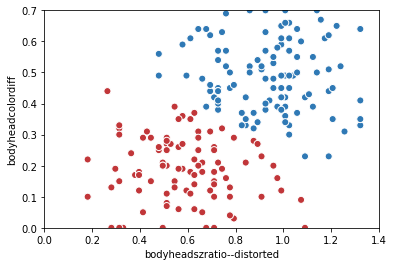

In [14]:
visual_weights = [2.73027025, 1]
w = -0.73027025
b = 0.68565111
xd = np.array([0, 1])
yd = w*xd + b
# plt.plot(xd, yd, 'k', lw=1, ls='--')
# plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.scatter(df[selected_features[0]]*np.sqrt(2.73027025),df[selected_features[1]], c=df['pseudo_label'], s=50,
        cmap="RdBu", vmin=-.2, vmax=1.2,
        edgecolor="white", linewidth=1)

plt.xlim(0, 1.4)
plt.ylim(0, 0.7)
# plt.ylim(ymin, ymax)
plt.ylabel(selected_features[1])
plt.xlabel(selected_features[0]+'--distorted')
plt.show()


## misalignment between human and groundtruth

In [ ]:
#  df_train[selected_features].iloc[0]
#  df_train[selected_features].head(5)
# selected = selected_features.append('pseudo_label')
# selected_features
df_train[selected_features].to_numpy()

In [16]:
[1,2]*np.array([3,4])

array([3, 8])

In [71]:
## human 1nn
# Example of calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
# def euclidean_distance(row1, row2):
# 	distance = 0.0
# 	for i in range(len(row1)-1):
# 		distance += (row1[i] - row2[i])**2
# 	return sqrt(distance)

def euclidean_distance(row1, row2):
    visual_weights = [2.73027025, 1]
    q = row1[:2]-row2[:2]
    return np.sqrt((visual_weights*q*q).sum())

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
    # print(neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
# def get_1nn(data, index):
#     dist = euclidean_distances(data)
#     return np.argsort(dist[index])[1]

prediction = predict_classification(df_train[selected_features].to_numpy(), df_train[selected_features].to_numpy()[4],1)
# print('Expected %d, Got %d.' % (df_train[selected_features].to_numpy()[4][-1], prediction))


acc_count = 0
for test_row in df_test[selected_features].to_numpy():
	# print(test_row)
	pred = predict_classification(df_train[selected_features].to_numpy(), test_row,1)
	actual = test_row[-1]
	if actual == pred:
		acc_count +=1

acc_count/len(df_test[selected_features].to_numpy())
# acc_count

0.975

## Triplet annotation
25000 from training set

10000 from validation set

function for testing set

In [8]:
# df.shape]
from itertools import combinations

df[selected_features]
a  = list(range(200))
b = list(combinations(a, 3))
print(len(b))
b_final = []
for trip in b:
    a,p,n = trip
    b_final.append([a,p,n])
    b_final.append([p,a,n])
    b_final.append([n,p,a])
print(len(b_final))
import random
SEED = 448
random.seed(SEED)
selected_triplets = random.sample(b_final, k=2000)
# len(list(combinations(list(range(120)), 3)))
# b[:100]

1313400
3940200


In [10]:
# [-0.73027025] [0.68565111]
# [-2.73027025] [1.64565111]
# m = [-2.73027025]
# c = [1.64565111]
# yd = m*xd + c

## weighted euclidean distance
def weightedL2(a, b, visual_weights):
    q = a-b
    return np.sqrt((visual_weights*q*q).sum())

visual_weights = [2.73027025, 1]

# for index, row in df.iterrows():
#     for feature in features:
#         # print(row[feature])
# random.randint(0, len(b))
for trip in selected_triplets:
    a, p, n = trip
    print(a,p,n)
    
    break
    # weightedL2()

113 39 22


In [11]:
df[(df['index']==20) | (df['index']==97) |  (df['index']==125)]
point1 = df[(df['index']==a)][selected_features].to_numpy()
point2 = df[(df['index']==p)][selected_features].to_numpy()
point3 = df[(df['index']==n)][selected_features].to_numpy()
print(weightedL2(point1,point2,visual_weights))
print(weightedL2(point1,point3,visual_weights))
print(point1,point2,visual_weights)
# np.sqrt(2.73027025*(0.24-0.19)**2+1*(0.33-0.12)**2)

0.35512083858878235
0.42748320507945103
[[0.51 0.42]] [[0.31 0.29]] [2.73027025, 1]


In [12]:
def calc_triplets(trip):
    a,p,n  = trip
    point1 = df[(df['index']==a)][selected_features].to_numpy()
    point2 = df[(df['index']==p)][selected_features].to_numpy()
    point3 = df[(df['index']==n)][selected_features].to_numpy()
    d_ap = weightedL2(point1,point2,visual_weights)
    d_an = weightedL2(point1,point3,visual_weights)
    if d_ap>d_an:
        return [a,n,p]
    else:
        return [a,p,n]
calc_triplets([97,125,20])


[97, 20, 125]

In [13]:
# # 120 40 40 
# from PIL import Image
# addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg'
# # addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.pdf'
# display.display(display.Image(filename=addr))
# # Image.open('/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg').show()
# # image.show()

## Seperate train || validation || testing

In [31]:
df.shape[0]
df_train = df.sample(n=int(df.shape[0]*0.8), random_state=1)
df_test = df.drop(df_train.index)
df_val = df_train.sample(n=int(df.shape[0]*0.2), random_state=23)
df_train = df_train.drop(df_val.index)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
# len(set(sorted(np.append(df_train['index'].to_numpy(), [df_val['index'].to_numpy(), df_test['index'].to_numpy()]))))

(120, 10)
(40, 10)
(40, 10)


In [15]:
# move images into corresponding directory
images_files = os.listdir(os.path.join(wee_ves_dir,'images'))
images_files
b = [a for a in images_files if 'jpg' in a and 'vespula' not in a]
len(b)
# sorted(b)
# df.shape
# for item in fileList:
#     shutil.copy(item[0], "/Users/username/Desktop/testPhotos")

200

In [16]:
# df[df['index']==188]
df_train['index'].to_numpy()
# shutil.copy(item[0], "/Users/username/Desktop/testPhotos")

array([ 58,  40,  34, 184, 198,  95,   4,  29, 168,  18,  11,  89, 110,
       118, 159,  16,  44,  94, 162,  38,  28,  27, 165, 194, 177, 176,
        97, 174,  73,  69, 172, 108, 107, 189,  14,  19,  39, 185, 124,
        98,  53,  33, 179, 181, 106, 199, 116,  78,   5, 127, 105,  48,
        54,  84, 183, 158, 166,  93, 120, 154,  90,  81, 122, 191,  13,
       132,  45,  99,  36, 161, 186, 153, 103, 148, 173,  21,  91, 152,
         2,  70,  85,   6,  77,  65, 167,  88, 130,  46,  62,  74,  92,
       147, 160,  87, 180, 145, 164,  10,  32,  83, 182, 100, 125,  23,
       126,   9, 135,  15,  41, 163,  80,  52,  26,  76,  43,  24,   3,
       169,  49, 131])

In [137]:
# sum(df['label'][:100])
# sum(df['pseudo_label'][:100])

In [17]:
index = 99
label = df[df['index']==index]['pseudo_label'].to_numpy()[0]
label

0

In [18]:
image_path = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/images'
def cp_image(index,split):
    label = df[df['index']==index]['pseudo_label'].to_numpy()[0]
    file_path = os.path.join('/net/scratch/chacha/data/weevil_vespula', split)
    file_path = os.path.join(file_path, str(label))
    # print(file_path)
    image_file = os.path.join(image_path, str(index)+'.jpg')
    shutil.copy(image_file, file_path)

In [19]:
train_indexs = df_train['index'].to_numpy()
# print(train_indexs)
for tr_index in train_indexs:
    cp_image(tr_index,'train')

In [21]:
val_indexs = df_val['index'].to_numpy()
for tr_index in val_indexs:
    cp_image(tr_index,'valid')

test_indexs = df_test['index'].to_numpy()
for tr_index in test_indexs:
    cp_image(tr_index,'test')

In [20]:
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/train/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/train/0')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/valid/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/valid/0')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/test/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/test/0')))

60
60
25
15
20
20


## Sample triplets

In [22]:
## sample triplets function 
## input: a list
## output: a random list of triplets
def sample_triplets(A, number_of_triplets):
    B = list(combinations(A, 3))
    print(len(B))
    B_final = []
    for trip in B:
        a,p,n = trip
        B_final.append([a,p,n])
        B_final.append([p,a,n])
        B_final.append([n,p,a])
    print("total triplets number: ", len(B_final))
    SEED = 448
    random.seed(SEED)
    selected_triplets = random.sample(B_final, k=number_of_triplets)
    return selected_triplets

## sample 25000 training triplets
train_triplets = sample_triplets(train_indexs, 25000)
val_triplets = sample_triplets(val_indexs, 10000)



280840
total triplets number:  842520
9880
total triplets number:  29640


In [67]:
test_triplets = sample_triplets(test_indexs, 10000)

9880
total triplets number:  29640


In [24]:
# len(train_triplets)
# len(val_triplets)
train_triplets_final = []
for trip in train_triplets:
    # a,p,n = trip
    train_triplets_final.append(calc_triplets(trip))


In [27]:

valid_triplets_final = []
for trip in val_triplets:
    # a,p,n = trip
    valid_triplets_final.append(calc_triplets(trip))


In [68]:

test_triplets_final = []
for trip in test_triplets:
    # a,p,n = trip
    test_triplets_final.append(calc_triplets(trip))


In [25]:
train_triplets_final[:5]

[[6, 16, 88], [169, 118, 152], [4, 26, 159], [186, 153, 44], [172, 168, 91]]

In [28]:
# train_triplets_final_final = []
# for tmp in train_triplets_final:
#     a,p,n = tmp
#     train_triplets_final_final.append([a,p,n])
# train_triplets_final_final[:5]
valid_triplets_final_final = []
for tmp in valid_triplets_final:
    a,p,n = tmp
    valid_triplets_final_final.append([a,p,n])
valid_triplets_final_final[:5]

[[55, 136, 119],
 [64, 187, 150],
 [102, 112, 149],
 [111, 136, 104],
 [155, 151, 113]]

In [184]:
with open('/net/scratch/chacha/explain_teach/data/bm_triplets/3c2_unique=182/train_triplets.pkl','rb') as f:
    m_dict = pickle.load(f)

In [192]:
# m_dict
with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl','rb') as f:
    m_dict = pickle.load(f)

In [194]:
# m_dict

## file name index to triplet index

In [56]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i.pkl', 'rb') as f:
  p2i = pickle.load(f)
# p2i
print(train_triplets_final[0])
print(p2i[str(6)],p2i[str(16)],p2i[str(88)])

len(train_triplets_final)
train_triplets_final_final_torch_index = []
for trip in train_triplets_final:
    a,p,n = trip
    train_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

[6, 16, 88]
34 5 49


In [57]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i_valid.pkl', 'rb') as f:
  p2i = pickle.load(f)
len(valid_triplets_final_final)
valid_triplets_final_final_torch_index = []
for trip in valid_triplets_final_final:
    a,p,n = trip
    valid_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

In [70]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i_test.pkl', 'rb') as f:
  p2i = pickle.load(f)
len(test_triplets_final)
test_triplets_final_final_torch_index = []
for trip in test_triplets_final:
    a,p,n = trip
    test_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

In [71]:
import pickle

# save_triplet_path = 
# with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl', 'wb') as f:
#   pickle.dump(train_triplets_final_final_torch_index, f)
# with open('/net/scratch/chacha/data/weevil_vespula/valid_triplet.pkl', 'wb') as f:
#   pickle.dump(valid_triplets_final_final_torch_index, f)
with open('/net/scratch/chacha/data/weevil_vespula/test_triplet.pkl', 'wb') as f:
  pickle.dump(test_triplets_final_final_torch_index, f)
with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl', 'rb') as f:
  train_triplets_final_final_torch_index = pickle.load(f)
with open('/net/scratch/chacha/data/weevil_vespula/valid_triplet.pkl', 'rb') as f:
  valid_triplets_final_final_torch_index = pickle.load(f)
with open('/net/scratch/chacha/data/weevil_vespula/test_triplet.pkl', 'rb') as f:
  test_triplets_final_final_torch_index = pickle.load(f)

In [62]:
valid_triplets_final_final_torch_index[:5]

[[39, 24, 22], [10, 33, 28], [15, 18, 27], [1, 24, 16], [30, 29, 19]]

In [63]:
train_triplets_final_final_torch_index[:5]

[[34, 5, 49], [96, 68, 82], [21, 11, 86], [108, 83, 25], [97, 95, 53]]

In [42]:
train_triplets_final_final_torch_index[:5]

[[34, 5, 49], [96, 68, 82], [21, 11, 86], [108, 83, 25], [97, 95, 53]]

In [41]:
valid_triplets_final_final_torch_index[:5]

[[39, 24, 22], [10, 33, 28], [15, 18, 27], [1, 24, 16], [30, 29, 19]]

In [74]:
test_triplets_final_final_torch_index[:10]

[[17, 5, 20],
 [31, 33, 4],
 [21, 35, 14],
 [22, 34, 5],
 [26, 38, 39],
 [2, 14, 0],
 [28, 20, 3],
 [20, 38, 19],
 [11, 19, 26],
 [34, 22, 6]]

In [75]:
for trip in test_triplets_final:
    a,p,n = trip
    print(a,p,n)
    break

79 22 115


In [76]:
test_triplets_final[:10]

[[79, 22, 115],
 [156, 175, 20],
 [121, 190, 7],
 [129, 178, 22],
 [140, 61, 8],
 [128, 7, 1],
 [142, 115, 133],
 [115, 61, 96],
 [60, 96, 140],
 [178, 129, 25]]